In [1]:
import matplotlib.pyplot as plt

## Plot Histogram

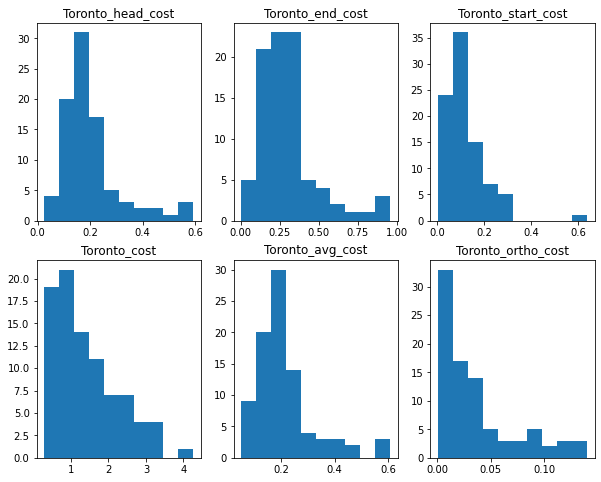

In [89]:
cost_list = ['Toronto_head_cost.txt', 'Toronto_end_cost.txt','Toronto_start_cost.txt', 'Toronto_cost.txt','Toronto_avg_cost.txt', 'Toronto_ortho_cost.txt']
ncols = int((len(cost_list)+1) / 2)
nrows = 2
fig, axs = plt.subplots(nrows, ncols)

for idx, cost_file in enumerate(cost_list):
    with open(cost_file) as f:
        lines = f.readlines()
    cost_vals = [float(x[:-1]) for x in lines]
    i = int(idx / (nrows+1))
    j = int(idx % ncols)
    axs[i, j].set_title(cost_file.split('.')[0])
    axs[i, j].hist(cost_vals)
fig.set_size_inches(10, 8)

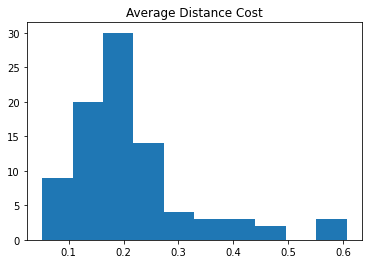

In [86]:
cost_avg = 'Toronto_avg_cost.txt'
cost_ortho ='Toronto_ortho_cost.txt'

with open(cost_avg) as f:
    lines = f.readlines()
cost_vals = [float(x[:-1]) for x in lines]
plt.title("Average Distance Cost")
plt.hist(cost_vals)
plt.savefig('avg_cost.png')

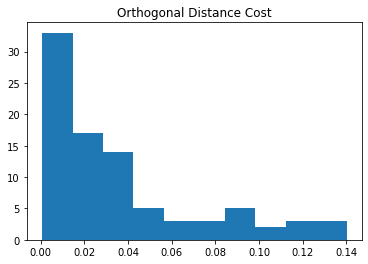

In [88]:
cost_ortho ='Toronto_ortho_cost.txt'

with open(cost_ortho) as f:
    lines = f.readlines()
cost_vals = [float(x[:-1]) for x in lines]
plt.title("Orthogonal Distance Cost")
plt.hist(cost_vals)
plt.savefig('ortho_cost.png')

## Getting number of assigned Ground Truth

In [78]:
gt_file = 'num_GT.txt'
assigned_file = 'num_assigned.txt'

with open(gt_file) as f:
    lines = f.readlines()
    num_gt = [float(x[:-1]) for x in lines]
    
with open(assigned_file) as f:
    lines = f.readlines()
    num_assigned = [float(x[:-1]) for x in lines]
    
print("Total number of assigned dashed markings in all samples: ", sum(num_assigned) / sum(num_gt))

Total number of assigned dashed markings in all samples:  0.6592592592592592


In [79]:
for idx, [i_gt, i_pred] in enumerate(zip(num_gt, num_assigned)):
    print("Percentage of Assigned to GT of sample {} is {} ".format(idx+1, i_pred / i_gt))

Percentage of Assigned to GT of sample 1 is 0.8333333333333334 
Percentage of Assigned to GT of sample 2 is 0.6 
Percentage of Assigned to GT of sample 3 is 0.8 
Percentage of Assigned to GT of sample 4 is 0.8571428571428571 
Percentage of Assigned to GT of sample 5 is 0.7777777777777778 
Percentage of Assigned to GT of sample 6 is 0.5 
Percentage of Assigned to GT of sample 7 is 0.9285714285714286 
Percentage of Assigned to GT of sample 8 is 0.5454545454545454 
Percentage of Assigned to GT of sample 9 is 0.6875 
Percentage of Assigned to GT of sample 10 is 0.29411764705882354 
